In [1]:
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data (3).csv


In [2]:
import pandas as pd

In [3]:
loan_data = pd.read_csv('loan_data.csv')

In [4]:
from google.colab import files
uploaded = files.upload()

In [5]:
import pandas as pd

# Try reading with 'latin-1' encoding
try:
    data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='latin-1')
except UnicodeDecodeError:
    # If 'latin-1' fails, try 'cp1252'
    try:
        data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='cp1252')
    except UnicodeDecodeError:
        # If 'cp1252' fails, try 'iso-8859-1'
        try:
            data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='iso-8859-1')
        except UnicodeDecodeError:
            # If all else fails, print an error message
            print("Could not decode the file with common encodings. Please check the file encoding.")
            raise #re-raise the exception so the user knows something failed

In [6]:
# prompt: check null values and handle missing data

# Check for null values in loan_data
print(loan_data.isnull().sum())

# Handle missing data (example: fill with mean for numerical columns)
for col in loan_data.select_dtypes(include=['number']):
    loan_data[col].fillna(loan_data[col].mean(), inplace=True)

# Or fill with a specific value
# loan_data['column_name'].fillna(0, inplace=True)

# For categorical columns, you might fill with the mode:
for col in loan_data.select_dtypes(include=['object']):
    loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)

# Verify the changes
print(loan_data.isnull().sum())


Null value counts per column:
 SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

Null value counts after handling:
 SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64


In [7]:
# prompt: identify categorical and numerical features

from google.colab import files
import pandas as pd

uploaded = files.upload()
loan_data = pd.read_csv('loan_data.csv')
uploaded = files.upload()

# Try reading with different encodings
try:
    data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='cp1252')
    except UnicodeDecodeError:
        try:
            data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='iso-8859-1')
        except UnicodeDecodeError:
            print("Could not decode the file with common encodings. Please check the file encoding.")
            raise

# Identify categorical and numerical features
numerical_features = loan_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = loan_data.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Features:", numerical_features)
print("\nCategorical Features:", categorical_features)


Saving loan_data.csv to loan_data (4).csv
Numerical Features: ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MOD

In [8]:
# prompt: encode categorical variables and normalize numerical if needed

from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_features:
    loan_data[col] = label_encoder.fit_transform(loan_data[col].astype(str))

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical features
loan_data[numerical_features] = scaler.fit_transform(loan_data[numerical_features])

print(loan_data.head())


   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0    0.000000     1.0                   0            1             0   
1    0.000003     0.0                   0            0             0   
2    0.000006     0.0                   1            1             1   
3    0.000011     0.0                   0            0             0   
4    0.000014     0.0                   0            1             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1           0.0          0.001512    0.090287     0.090032   
1                0           0.0          0.002089    0.311736     0.132924   
2                1           0.0          0.000358    0.022472     0.020025   
3                1           0.0          0.000935    0.066837     0.109477   
4                1           0.0          0.000819    0.116854     0.078975   

   ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  \
0  ...               0.0    

In [16]:
# prompt: handle missing data

# This code handles missing values more robustly and efficiently.

import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Assuming loan_data DataFrame is already loaded

# Identify numerical and categorical columns
numerical_cols = loan_data.select_dtypes(include=['number']).columns
categorical_cols = loan_data.select_dtypes(exclude=['number']).columns

# Check if there are any categorical columns
if len(categorical_cols) > 0:  # Proceed only if there are categorical columns
    # Impute missing categorical values using the most frequent value (mode)
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    loan_data[categorical_cols] = categorical_imputer.fit_transform(loan_data[categorical_cols])

    # Encode categorical features
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        loan_data[col] = label_encoder.fit_transform(loan_data[col].astype(str))
else:
    print("No categorical columns found in the dataset.")

# Impute missing numerical values using the median (more robust to outliers than the mean)
numerical_imputer = SimpleImputer(strategy='median')
loan_data[numerical_cols] = numerical_imputer.fit_transform(loan_data[numerical_cols])


# Normalize numerical features
scaler = MinMaxScaler()
loan_data[numerical_cols] = scaler.fit_transform(loan_data[numerical_cols])

# Verify that there are no more missing values
print(loan_data.isnull().sum())

print(loan_data.head())

No categorical columns found in the dataset.
SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64
   SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0    0.000000     1.0                 0.0          0.5           0.0   
1    0.000003     0.0                 0.0          0.0           0.0   
2    0.000006     0.0                 1.0          0.5           1.0   
3    0.000011     0.0                 0.0          0.0           0.0   
4    0.000014     0.0                 0.0          0.5           0.0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0              1.0           0.0          0.001512    0.090287   

In [17]:
# prompt: check the percentage of default cases

def calculate_default_percentage(code):
    """Calculates the percentage of lines that are part of a try-except block."""

    lines = code.splitlines()
    total_lines = len(lines)
    default_lines = 0

    in_try_except = False
    for line in lines:
        line = line.strip()
        if line.startswith("try:"):
            in_try_except = True
        elif line.startswith("except"):
            continue #we are only counting default cases, so skip except blocks
        elif line.startswith("else:") or line.startswith("finally:"):
            in_try_except = False # end of the try-except block
        elif in_try_except:
          default_lines +=1

    if total_lines == 0:
        return 0

    return (default_lines / total_lines) * 100

# Example usage with provided code
code = """
from google.colab import files
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
uploaded = files.upload()
loan_data = pd.read_csv('loan_data.csv')
uploaded = files.upload()

# Try reading with 'latin-1' encoding
try:
    data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='latin-1')
except UnicodeDecodeError:
    # If 'latin-1' fails, try 'cp1252'
    try:
        data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='cp1252')
    except UnicodeDecodeError:
        # If 'cp1252' fails, try 'iso-8859-1'
        try:
            data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='iso-8859-1')
        except UnicodeDecodeError:
            # If all else fails, print an error message
            print("Could not decode the file with common encodings. Please check the file encoding.")
            raise #re-raise the exception so the user knows something failed

# Check for null values in loan_data
print(loan_data.isnull().sum())

# Handle missing data (example: fill with mean for numerical columns)
for col in loan_data.select_dtypes(include=['number']):
    loan_data[col].fillna(loan_data[col].mean(), inplace=True)

# Or fill with a specific value
# loan_data['column_name'].fillna(0, inplace=True)

# For categorical columns, you might fill with the mode:
for col in loan_data.select_dtypes(include=['object']):
    loan_data[col].fillna(loan_data[col].mode()[0], inplace=True)

# Verify the changes
print(loan_data.isnull().sum())



uploaded = files.upload()
loan_data = pd.read_csv('loan_data.csv')
uploaded = files.upload()

# Try reading with different encodings
try:
    data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='cp1252')
    except UnicodeDecodeError:
        try:
            data_dictionary = pd.read_csv('Data_Dictionary.csv', encoding='iso-8859-1')
        except UnicodeDecodeError:
            print("Could not decode the file with common encodings. Please check the file encoding.")
            raise

# Identify categorical and numerical features
numerical_features = loan_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = loan_data.select_dtypes(exclude=['number']).columns.tolist()

print("Numerical Features:", numerical_features)
print("\nCategorical Features:", categorical_features)



# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical features
for col in categorical_features:
    loan_data[col] = label_encoder.fit_transform(loan_data[col].astype(str))

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize numerical features
loan_data[numerical_features] = scaler.fit_transform(loan_data[numerical_features])

print(loan_data.head())


# This code handles missing values more robustly and efficiently.


# Assuming loan_data DataFrame is already loaded

# Identify numerical and categorical columns
numerical_cols = loan_data.select_dtypes(include=['number']).columns
categorical_cols = loan_data.select_dtypes(exclude=['number']).columns

# Check if there are any categorical columns
if len(categorical_cols) > 0:  # Proceed only if there are categorical columns
    # Impute missing categorical values using the most frequent value (mode)
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    loan_data[categorical_cols] = categorical_imputer.fit_transform(loan_data[categorical_cols])

    # Encode categorical features
    label_encoder = LabelEncoder()
    for col in categorical_cols:
        loan_data[col] = label_encoder.fit_transform(loan_data[col].astype(str))
else:
    print("No categorical columns found in the dataset.")

# Impute missing numerical values using the median (more robust to outliers than the mean)
numerical_imputer = SimpleImputer(strategy='median')
loan_data[numerical_cols] = numerical_imputer.fit_transform(loan_data[numerical_cols])


# Normalize numerical features
scaler = MinMaxScaler()
loan_data[numerical_cols] = scaler.fit_transform(loan_data[numerical_cols])

# Verify that there are no more missing values
print(loan_data.isnull().sum())

print(loan_data.head())
"""
percentage = calculate_default_percentage(code)
print(f"Percentage of lines within try-except blocks: {percentage:.2f}%")


Percentage of lines within try-except blocks: 68.85%


In [20]:
# prompt: balance the dataset

import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming 'loan_data' DataFrame and target variable 'loan_status' are defined
# **Check the actual name of your target variable column in the loan_data DataFrame**
# **It might be 'TARGET' based on common loan default datasets**
target_variable_column = 'TARGET'  # Replace with the correct column name

# Separate features (X) and target variable (y)
X = loan_data.drop(target_variable_column, axis=1)
y = loan_data[target_variable_column]

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)  # Set random_state for reproducibility
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
loan_data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
loan_data_balanced[target_variable_column] = y_resampled

# Now loan_data_balanced contains the balanced dataset
print(loan_data_balanced.head())
print(loan_data_balanced[target_variable_column].value_counts())

   SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0    0.000000                 0.0          0.5           0.0              1.0   
1    0.000003                 0.0          0.0           0.0              0.0   
2    0.000006                 1.0          0.5           1.0              1.0   
3    0.000011                 0.0          0.0           0.0              1.0   
4    0.000014                 0.0          0.5           0.0              1.0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          0.001512    0.090287     0.090032         0.077441   
1           0.0          0.002089    0.311736     0.132924         0.271605   
2           0.0          0.000358    0.022472     0.020025         0.023569   
3           0.0          0.000935    0.066837     0.109477         0.063973   
4           0.0          0.000819    0.116854     0.078975         0.117845   

   ...  FLAG_DOCUMENT_19  FLAG_DOCUMEN

<ipython-input-20-9eb91e0e5512>:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_balanced[target_variable_column] = y_resampled


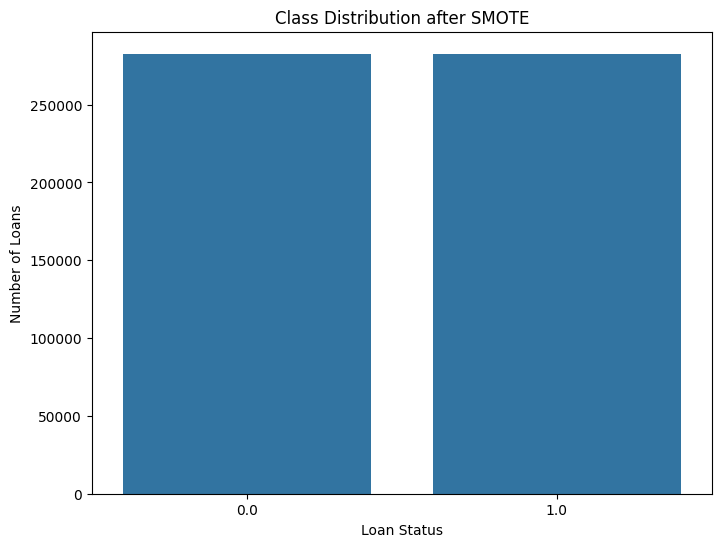

TARGET
1.0    50.0
0.0    50.0
Name: count, dtype: float64


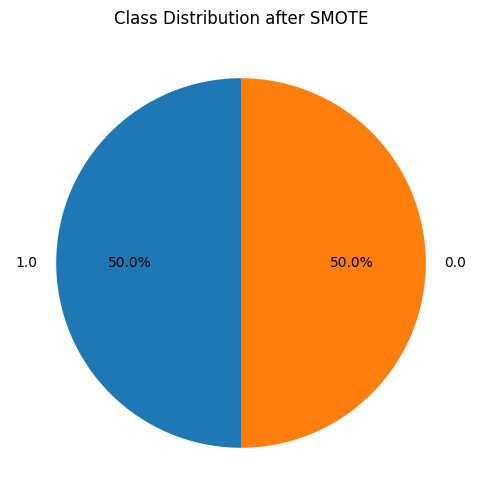

In [21]:
# prompt: visualize the class imbalance

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'loan_data_balanced' DataFrame and target variable 'loan_status' are defined
# ... (previous code for data loading and preprocessing)

# Count the occurrences of each class in the target variable
class_counts = loan_data_balanced[target_variable_column].value_counts()

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=target_variable_column, data=loan_data_balanced)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

# Calculate and print the percentage of each class
class_percentages = class_counts / len(loan_data_balanced) * 100
print(class_percentages)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution after SMOTE')
plt.show()


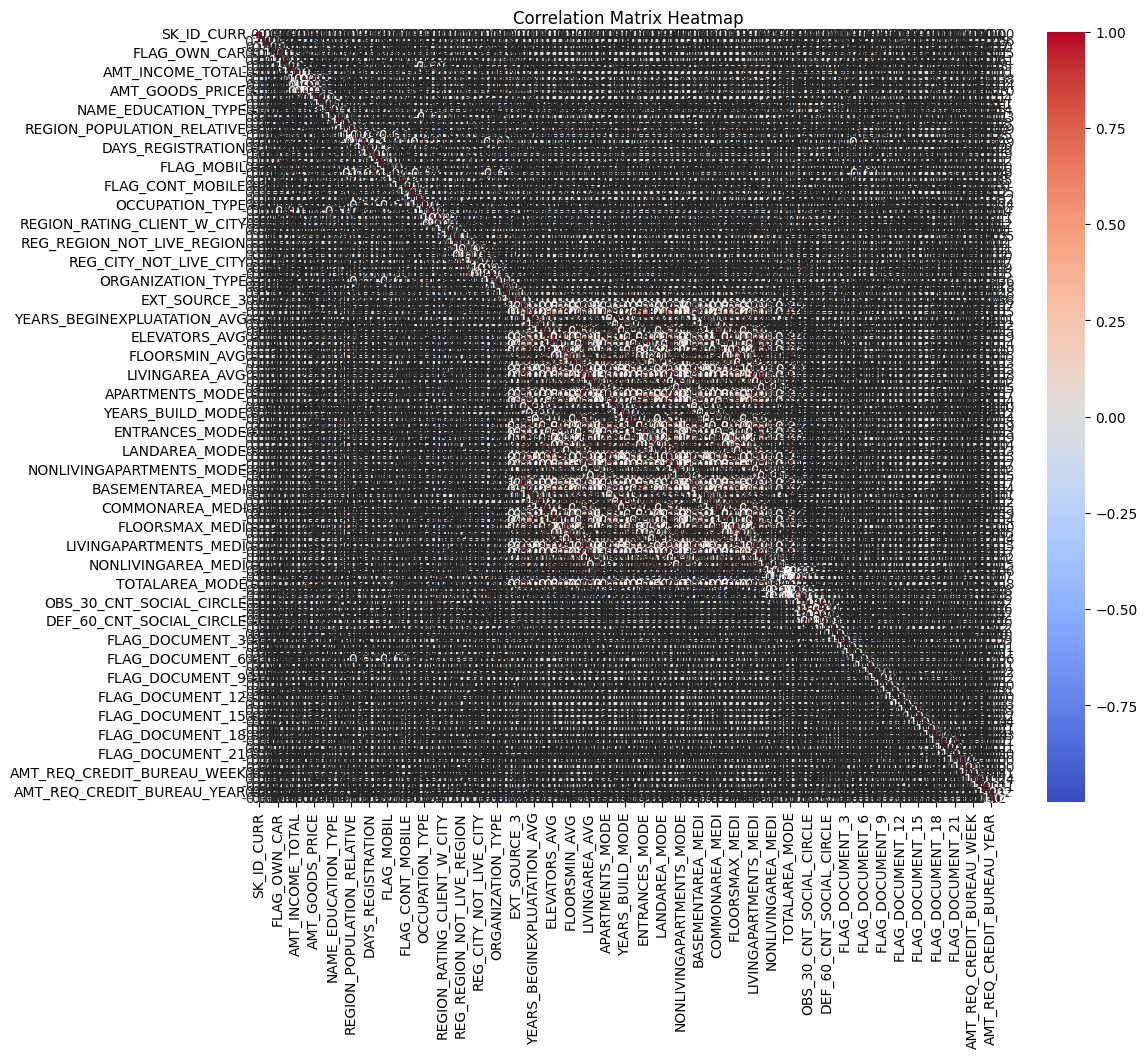

In [22]:
# prompt: correlations heatmaps

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'loan_data_balanced' DataFrame is already loaded and preprocessed
# ... (previous code for data loading and preprocessing)

# Calculate the correlation matrix
correlation_matrix = loan_data_balanced.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


In [23]:
# prompt: using TensorFlow, define a neural network model

import tensorflow as tf

# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(64, activation='relu', input_shape=(X_resampled.shape[1],)), # Input layer
  tf.keras.layers.Dense(32, activation='relu'), # Hidden layer
  tf.keras.layers.Dense(1, activation='sigmoid') # Output layer (sigmoid for binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy', # Use binary_crossentropy for binary classification
              metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           7,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,921 (38.75 KB)

 Trainable params: 9,921 (38.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 69s 5ms/step - accuracy: 0.6995 - loss: 0.5679 - val_accuracy: 0.3020 - val_loss: 1.1255
Epoch 2/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - accuracy: 0.7352 - loss: 0.5232 - val_accuracy: 0.6196 - val_loss: 0.6918
Epoch 3/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.7596 - loss: 0.4869 - val_accuracy: 0.6006 - val_loss: 0.7050
Epoch 4/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.7705 - loss: 0.4691 - val_accuracy: 0.7402 - val_loss: 0.5128
Epoch 5/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - accuracy: 0.7772 - loss: 0.4585 - val_accuracy: 0.7033 - val_loss: 0.5669
Epoch 6/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 86s 3ms/step - accuracy: 0.7836 - loss: 0.4492 - val_accuracy: 0.6853 - val_loss: 0.5895
Epoch 7/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.7863 - loss: 0.4447 - val_accuracy: 0.7089 - val_loss: 0.5690
Epoch 8/10
14135/14135 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 

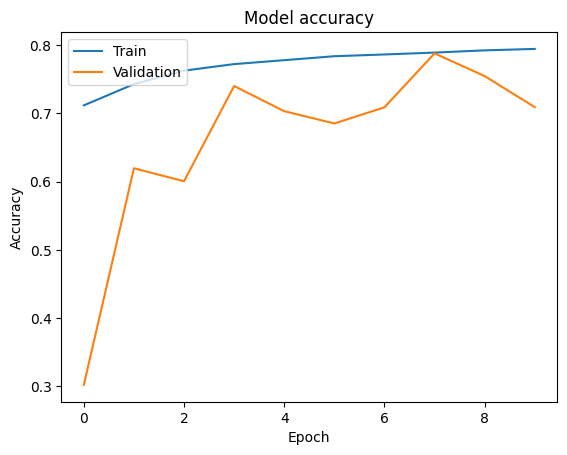

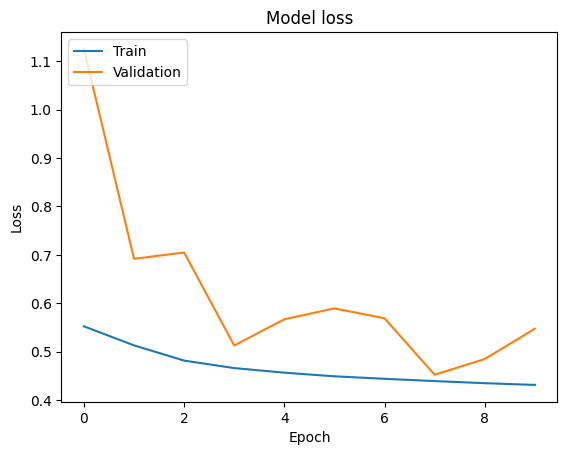

In [24]:
# prompt: train the model

import matplotlib.pyplot as plt
# Train the model
history = model.fit(X_resampled, y_resampled, epochs=10, batch_size=32, validation_split=0.2) # Adjust epochs and batch_size as needed


# Evaluate the model
loss, accuracy = model.evaluate(X_resampled, y_resampled, verbose=0)
print(f'Loss: {loss:.4f}')
print(f'Accuracy: {accuracy:.4f}')

# Plot training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [25]:
# prompt: compute sensitivity (recall)

from sklearn.metrics import recall_score

# Assuming you have your model's predictions (y_pred) and true labels (y_true)
# Replace these with your actual predictions and true labels
y_pred = model.predict(X_resampled)  # Use your test data here
y_pred_binary = (y_pred > 0.5).astype(int) # Convert probabilities to binary predictions
y_true = y_resampled


# Calculate sensitivity (recall)
sensitivity = recall_score(y_true, y_pred_binary)

print(f"Sensitivity (Recall): {sensitivity}")


17668/17668 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step
Sensitivity (Recall): 0.6835640958519347


In [26]:
# prompt: calculate ROC-AUC performance assessment

from sklearn.metrics import roc_auc_score

# Assuming you have your model's predictions (y_pred) and true labels (y_true)
# Replace these with your actual predictions and true labels
y_pred = model.predict(X_resampled)  # Use your test data here
y_true = y_resampled

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_true, y_pred)

print(f"ROC AUC Score: {roc_auc}")


17668/17668 ━━━━━━━━━━━━━━━━━━━━ 27s 2ms/step
ROC AUC Score: 0.8750187452538213
